In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
diabetes_df = pd.read_csv("/content/Dataset of Diabetes .csv")
diabetes_df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
diabetes_df.isnull().sum() #check missing values

# Fill missing numerical values with mean
# num_imputer = SimpleImputer(strategy="mean")
# diabetes_df.iloc[:, :] = num_imputer.fit_transform(diabetes_df)


,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [4]:
diabetes_encoded = pd.get_dummies(
    diabetes_df,
    columns=diabetes_df.select_dtypes(include="object").columns,
    drop_first=True
)
diabetes_encoded

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_M,Gender_f,CLASS_N,CLASS_P,CLASS_Y,CLASS_Y
0,502,17975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,False,False,False,False,False,False
1,735,34221,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,True,False,False,False,False,False
2,420,47975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,False,False,False,False,False,False
3,680,87656,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,False,False,False,False,False,False
4,504,34223,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,True,False,False,False,True,False
996,671,876534,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,True,False,False,False,False,True
997,669,87654,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,True,False,False,False,False,True
998,99,24004,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,True,False,False,False,False,True


In [5]:
diabetes_encoded = diabetes_encoded.astype(int)


In [12]:
diabetes_encoded.head()


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_M,Gender_f,CLASS_N,CLASS_P,CLASS_Y,CLASS_Y
0,502,17975,50,4,46,4,4,0,2,1,0,24,0,0,0,0,0,0
1,735,34221,26,4,62,4,3,1,1,2,0,23,1,0,0,0,0,0
2,420,47975,50,4,46,4,4,0,2,1,0,24,0,0,0,0,0,0
3,680,87656,50,4,46,4,4,0,2,1,0,24,0,0,0,0,0,0
4,504,34223,33,7,46,4,4,1,0,2,0,21,1,0,0,0,0,0


In [7]:
diabetes_encoded = diabetes_encoded.loc[:, ~diabetes_encoded.columns.duplicated()]


In [8]:
num_cols = [
    'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
    'HDL', 'LDL', 'VLDL', 'BMI'
]


In [10]:
Q1 = diabetes_encoded[num_cols].quantile(0.25)
Q3 = diabetes_encoded[num_cols].quantile(0.75)
IQR = Q3 - Q1

diabetes_no_outliers = diabetes_encoded[
    ~((diabetes_encoded[num_cols] < (Q1 - 1.5 * IQR)) |
      (diabetes_encoded[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]


In [11]:
diabetes_no_outliers

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_M,Gender_f,CLASS_N,CLASS_P,CLASS_Y,CLASS_Y
0,502,17975,50,4,46,4,4,0,2,1,0,24,0,0,0,0,0,0
2,420,47975,50,4,46,4,4,0,2,1,0,24,0,0,0,0,0,0
3,680,87656,50,4,46,4,4,0,2,1,0,24,0,0,0,0,0,0
6,721,34225,50,2,50,4,3,1,0,2,0,24,0,0,0,0,0,0
8,670,34229,43,2,67,4,3,0,2,3,1,21,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,193,454316,62,6,82,6,5,2,1,3,0,30,1,0,0,0,1,0
990,194,454316,57,4,70,9,5,3,1,1,1,29,0,0,0,0,1,0
991,195,4543,55,4,34,13,5,1,1,3,0,33,0,1,0,0,1,0
992,196,454316,55,3,39,8,5,2,1,2,0,27,1,0,0,0,1,0


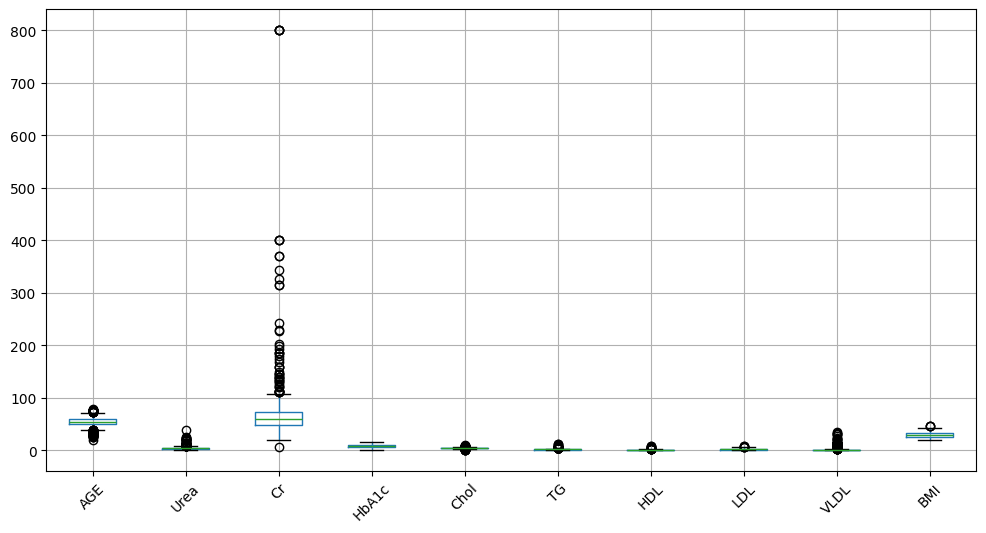

In [13]:
import matplotlib.pyplot as plt

diabetes_encoded[num_cols].boxplot(figsize=(12,6))
plt.xticks(rotation=45)
plt.show()


In [14]:
#2nd dataset

In [15]:
import pandas as pd

adult_df = pd.read_csv("/content/adult.csv")
adult_df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [16]:
adult_encoded = pd.get_dummies(
    adult_df,
    columns=adult_df.select_dtypes(include="object").columns,
    drop_first=True
)
adult_encoded

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48838,40,154374,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
48839,58,151910,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48840,22,201490,9,0,0,20,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [17]:
adult_encoded = adult_encoded.astype(int)


In [18]:
num_cols = [
    'age',
    'fnlwgt',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]


In [20]:
Q1 = adult_encoded[num_cols].quantile(0.25)
Q3 = adult_encoded[num_cols].quantile(0.75)
IQR = Q3 - Q1

adult_no_outliers = adult_encoded[
    ~((adult_encoded[num_cols] < (Q1 - 1.5 * IQR)) |
      (adult_encoded[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]


KeyError: "['education-num'] not in index"

In [21]:
list(adult_encoded.columns)


['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupati

In [22]:
Q1 = adult_encoded[num_cols].quantile(0.25)
Q3 = adult_encoded[num_cols].quantile(0.75)
IQR = Q3 - Q1

adult_no_outliers = adult_encoded[
    ~((adult_encoded[num_cols] < (Q1 - 1.5 * IQR)) |
      (adult_encoded[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]


KeyError: "['education-num'] not in index"

In [23]:
num_cols = [
    col for col in adult_encoded.columns
    if col in ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
]


In [24]:
Q1 = adult_encoded[num_cols].quantile(0.25)
Q3 = adult_encoded[num_cols].quantile(0.75)
IQR = Q3 - Q1

adult_no_outliers = adult_encoded[
    ~((adult_encoded[num_cols] < (Q1 - 1.5 * IQR)) |
      (adult_encoded[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]


In [25]:
print("Before:", adult_encoded.shape)
print("After :", adult_no_outliers.shape)


Before: (48842, 101)
After : (28558, 101)
